In [1]:
pwd

'C:\\Users\\Olakeyede Olayinka'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs
from pylab import rcParams
from numpy import cov
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\Olakeyede Olayinka\\downloads\\Viagogo.csv')
df.head()

,Date,Channel,User Type,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant
0,2014-10-10,Affiliate,Returning User,0,0,0,1211,1175
1,2014-10-10,Affiliate,Returning User,1,0,0,4076,4810
2,2014-10-10,Affiliate,Returning User,1,1,0,2766,3386
3,2014-10-10,Affiliate,Returning User,0,0,1,196,159
4,2014-10-10,Affiliate,Returning User,1,0,1,358,332


##Conversion rates


In [4]:
##overall conversion rate for the variation

CVR_Variant = df[df['Purchase']==1]['Visitors_Variant'].sum()/df['Visitors_Variant'].sum() *100

CVR_Variant.round(2)


5.31

In [5]:
##overall conversion rate for the control


CVR_Control = df[df['Purchase']==1]['Visitors_Control'].sum()/df['Visitors_Control'].sum() *100

CVR_Control.round(2)

5.56

##bounce rates


In [6]:
##filter visitors that only land on homepage i.e.where land == 1

df2= df[df['Land']==1 ]

bounce_Control = df2[df2['Bounce']==1]['Visitors_Control'].sum()/df2['Visitors_Control'].sum() *100
bounce_Control.round(2)

39.66

In [7]:
bounce_variant = df2[df2['Bounce']==1]['Visitors_Variant'].sum()/df2['Visitors_Variant'].sum() *100
bounce_variant.round(2)

41.27

##Conversion rate over time

In [9]:
##filter out users that purchased

df3= df[df['Purchase']==1 ]


In [10]:
##total number of visitors for each day

tables = pd.pivot_table(df,index=['Date'], values=['Visitors_Variant', 'Visitors_Control'], aggfunc=np.sum)
tables

,Visitors_Control,Visitors_Variant
Date,,
2014-10-10,134823,136799
2014-10-11,146452,150276
2014-10-12,139861,139387
2014-10-13,143092,144040
2014-10-14,144092,147529
2014-10-15,144917,146976
2014-10-16,153276,156195
2014-10-17,142540,143404
2014-10-18,156624,156327


In [11]:
##total number of purchases for each day
df3= df[df['Purchase']==1 ]
df3
table = pd.pivot_table(df3,index=['Date'], values=['Visitors_Variant', 'Visitors_Control'], aggfunc=np.sum)

table = table.rename(columns={'Visitors_Control': 'Visitors_Control_Purchase', 'Visitors_Variant': 'Visitors_Variant_Purchase'})
table


,Visitors_Control_Purchase,Visitors_Variant_Purchase
Date,,
2014-10-10,8164,8034
2014-10-11,6185,5948
2014-10-12,7989,7589
2014-10-13,7794,7383
2014-10-14,6583,6291
2014-10-15,6401,6179
2014-10-16,6091,5943
2014-10-17,8344,8147
2014-10-18,15243,15264


In [12]:
##merge tables
df_concat = pd.concat([table, tables], axis=1)
df_concat

,Visitors_Control_Purchase,Visitors_Variant_Purchase,Visitors_Control,Visitors_Variant
Date,,,,
2014-10-10,8164,8034,134823,136799
2014-10-11,6185,5948,146452,150276
2014-10-12,7989,7589,139861,139387
2014-10-13,7794,7383,143092,144040
2014-10-14,6583,6291,144092,147529
2014-10-15,6401,6179,144917,146976
2014-10-16,6091,5943,153276,156195
2014-10-17,8344,8147,142540,143404
2014-10-18,15243,15264,156624,156327


In [13]:
##calculate daily conversion rate 

df_concat['CVR_Control'] = df_concat['Visitors_Control_Purchase']/ df_concat['Visitors_Control']*100
df_concat['CVR_Variant'] = df_concat['Visitors_Variant_Purchase']/ df_concat['Visitors_Variant']*100
df_concat = df_concat.drop(columns=['Visitors_Control_Purchase', 'Visitors_Variant_Purchase', 'Visitors_Control', 'Visitors_Variant'])

df_concat


,CVR_Control,CVR_Variant
Date,,
2014-10-10,6.055347,5.872850
2014-10-11,4.223227,3.958051
2014-10-12,5.712100,5.444554
2014-10-13,5.446845,5.125660
2014-10-14,4.568609,4.264246
2014-10-15,4.417011,4.204088
2014-10-16,3.973877,3.804859
2014-10-17,5.853795,5.681153
2014-10-18,9.732225,9.764148


In [14]:
##reset index - date
df_concat=df_concat.reset_index()


In [16]:
##change date colmn to date type

df_concat['Date'] = pd.to_datetime(df_concat['Date'])
df_concat

,Date,CVR_Control,CVR_Variant
0,2014-10-10,6.055347,5.872850
1,2014-10-11,4.223227,3.958051
2,2014-10-12,5.712100,5.444554
3,2014-10-13,5.446845,5.125660
4,2014-10-14,4.568609,4.264246
5,2014-10-15,4.417011,4.204088
6,2014-10-16,3.973877,3.804859
7,2014-10-17,5.853795,5.681153
8,2014-10-18,9.732225,9.764148
9,2014-10-19,6.458117,6.207532


Text(0, 0.5, 'Conversion Rate')

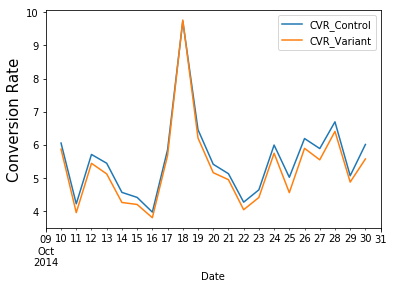

In [17]:
##plot daily conversion rate

df_concat.plot(x='Date', y=['CVR_Control', 'CVR_Variant'] )
plt.ylabel('Conversion Rate', fontsize=15)


##bounce rate over time

In [18]:
###bounce rate over time
##filter out users that land on the homepage not those that navigated from other pages to the homepage

df2= df[df['Land']==1 ]
df2

,Date,Channel,User Type,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant
1,2014-10-10,Affiliate,Returning User,1,0,0,4076,4810
2,2014-10-10,Affiliate,Returning User,1,1,0,2766,3386
4,2014-10-10,Affiliate,Returning User,1,0,1,358,332
6,2014-10-10,Affiliate,New User,1,0,0,7165,6501
7,2014-10-10,Affiliate,New User,1,1,0,4709,4211
9,2014-10-10,Affiliate,New User,1,0,1,640,694
11,2014-10-10,Direct,Returning User,1,0,0,9099,8452
12,2014-10-10,Direct,Returning User,1,1,0,6424,7844
14,2014-10-10,Direct,Returning User,1,0,1,952,965
16,2014-10-10,Direct,New User,1,0,0,15567,14824


In [19]:
##pivot table
table2 = pd.pivot_table(df2,index=['Date'], values=['Visitors_Variant', 'Visitors_Control'], aggfunc=np.sum)
table2

,Visitors_Control,Visitors_Variant
Date,,
2014-10-10,116714,118595
2014-10-11,128451,132081
2014-10-12,120823,120355
2014-10-13,124564,126101
2014-10-14,125204,128482
2014-10-15,126881,128842
2014-10-16,135773,138574
2014-10-17,124010,124898
2014-10-18,133914,133366


In [20]:
##total number of users that bounced ffrom the home page
df4= df2[df2['Bounce']==1 ]
df4
table3 = pd.pivot_table(df4,index=['Date'], values=['Visitors_Variant', 'Visitors_Control'], aggfunc=np.sum)
table3 = table3.rename(columns={'Visitors_Control': 'Visitors_Control_Bounce', 'Visitors_Variant': 'Visitors_Variant_Bounce'})

table3

,Visitors_Control_Bounce,Visitors_Variant_Bounce
Date,,
2014-10-10,43480,45786
2014-10-11,59294,63668
2014-10-12,47482,49703
2014-10-13,49522,53187
2014-10-14,53472,56601
2014-10-15,57887,60269
2014-10-16,63856,67398
2014-10-17,45956,47830
2014-10-18,38635,39023


In [22]:
##merge tables
df_concat2 = pd.concat([table3, table2], axis=1)
df_concat2

,Visitors_Control_Bounce,Visitors_Variant_Bounce,Visitors_Control,Visitors_Variant
Date,,,,
2014-10-10,43480,45786,116714,118595
2014-10-11,59294,63668,128451,132081
2014-10-12,47482,49703,120823,120355
2014-10-13,49522,53187,124564,126101
2014-10-14,53472,56601,125204,128482
2014-10-15,57887,60269,126881,128842
2014-10-16,63856,67398,135773,138574
2014-10-17,45956,47830,124010,124898
2014-10-18,38635,39023,133914,133366


In [23]:
##calculate daily bounce rate

df_concat2['Bounce_Control'] = df_concat2['Visitors_Control_Bounce']/ df_concat2['Visitors_Control']*100
df_concat2['Bounce_Variant'] = df_concat2['Visitors_Variant_Bounce']/ df_concat2['Visitors_Variant']*100
df_concat2 = df_concat2.drop(columns=['Visitors_Control_Bounce', 'Visitors_Variant_Bounce', 'Visitors_Control', 'Visitors_Variant'])

df_concat2

,Bounce_Control,Bounce_Variant
Date,,
2014-10-10,37.253457,38.607024
2014-10-11,46.160793,48.203754
2014-10-12,39.298809,41.296996
2014-10-13,39.756270,42.178095
2014-10-14,42.707901,44.053642
2014-10-15,45.623064,46.777448
2014-10-16,47.031442,48.636829
2014-10-17,37.058302,38.295249
2014-10-18,28.850606,29.260081


In [27]:
##reset index
df_concat3= df_concat2.reset_index()


In [30]:
df_concat3.dtypes

Date               object
Bounce_Control    float64
Bounce_Variant    float64
dtype: object

In [28]:
##change date colmn to date time
df_concat3['Date'] = pd.to_datetime(df_concat3['Date'])
df_concat3

,Date,Bounce_Control,Bounce_Variant
0,2014-10-10,37.253457,38.607024
1,2014-10-11,46.160793,48.203754
2,2014-10-12,39.298809,41.296996
3,2014-10-13,39.756270,42.178095
4,2014-10-14,42.707901,44.053642
5,2014-10-15,45.623064,46.777448
6,2014-10-16,47.031442,48.636829
7,2014-10-17,37.058302,38.295249
8,2014-10-18,28.850606,29.260081
9,2014-10-19,36.137781,37.709051


In [29]:
df_concat3.dtypes

Date              datetime64[ns]
Bounce_Control           float64
Bounce_Variant           float64
dtype: object

Text(0, 0.5, 'Bounce Rate')

<Figure size 1440x1440 with 0 Axes>

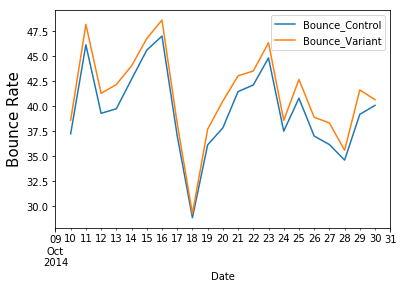

In [30]:
##plot bounce rate over time

plt.figure(figsize=(20,20))

df_concat3.plot(x='Date', y=['Bounce_Control', 'Bounce_Variant'] )
plt.ylabel('Bounce Rate', fontsize=15)


##Conversion rate by channel and user type

In [31]:
df5 = df.groupby("Channel")["Visitors_Control", "Visitors_Variant"].sum()
df5

,Visitors_Control,Visitors_Variant
Channel,,
Affiliate,502864,505955
Direct,1126827,1139063
Email,204567,208926
Paid Search,303561,311830
SEO,708959,730528
Social Media,149559,149551


In [32]:
##calculate conversion rate for each channel
df6= df[df['Purchase']==1 ]


df6 = df6.groupby("Channel")["Visitors_Control", "Visitors_Variant"].sum()
df6 = df6.rename(columns={'Visitors_Control': 'Visitors_Control_Purchase', 'Visitors_Variant': 'Visitors_Variant_Purchase'})


df6 =  pd.concat([df6, df5], axis=1)
#df6Visitors_Control
df6['CVR_Control'] = df6['Visitors_Control_Purchase']/df6['Visitors_Control'] *100
df6['CVR_Variant'] = df6['Visitors_Variant_Purchase']/df6['Visitors_Variant'] *100
df6 = df6.drop(columns=['Visitors_Control_Purchase', 'Visitors_Variant_Purchase', 'Visitors_Control', 'Visitors_Variant'])
df6 = df6.round(decimals=2)
df6



,CVR_Control,CVR_Variant
Channel,,
Affiliate,5.55,5.49
Direct,5.51,5.17
Email,5.89,5.53
Paid Search,5.70,5.44
SEO,5.34,5.06
Social Media,6.28,6.31


##conversion rate for each user type

In [34]:
##total number of visitors for each user type
df7 = df.groupby("User Type")["Visitors_Control", "Visitors_Variant"].sum()
df7

,Visitors_Control,Visitors_Variant
User Type,,
New User,1778012,1826430
Returning User,1218325,1219423


In [35]:
##conversion rate for each user type

df8= df[df['Purchase']==1 ]


df8 = df8.groupby("User Type")["Visitors_Control", "Visitors_Variant"].sum()
df8 = df8.rename(columns={'Visitors_Control': 'Visitors_Control_Purchase', 'Visitors_Variant': 'Visitors_Variant_Purchase'})
df8 =  pd.concat([df8, df7], axis=1)
df8['CVR_Control'] = df8['Visitors_Control_Purchase']/df8['Visitors_Control'] *100
df8['CVR_Variant'] = df8['Visitors_Variant_Purchase']/df8['Visitors_Variant'] *100
df8 = df8.drop(columns=['Visitors_Control_Purchase', 'Visitors_Variant_Purchase', 'Visitors_Control', 'Visitors_Variant'])
df8 = df8.round(decimals=2)
df8


,CVR_Control,CVR_Variant
User Type,,
New User,5.28,5.12
Returning User,5.96,5.58


##bounce rate for each channel

In [36]:
###total number fo visitors per channel

df9= df[df['Land']==1 ]
df9


,Date,Channel,User Type,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant
1,2014-10-10,Affiliate,Returning User,1,0,0,4076,4810
2,2014-10-10,Affiliate,Returning User,1,1,0,2766,3386
4,2014-10-10,Affiliate,Returning User,1,0,1,358,332
6,2014-10-10,Affiliate,New User,1,0,0,7165,6501
7,2014-10-10,Affiliate,New User,1,1,0,4709,4211
9,2014-10-10,Affiliate,New User,1,0,1,640,694
11,2014-10-10,Direct,Returning User,1,0,0,9099,8452
12,2014-10-10,Direct,Returning User,1,1,0,6424,7844
14,2014-10-10,Direct,Returning User,1,0,1,952,965
16,2014-10-10,Direct,New User,1,0,0,15567,14824


In [37]:
df10 = df9.groupby("Channel")["Visitors_Control", "Visitors_Variant"].sum()
df10

,Visitors_Control,Visitors_Variant
Channel,,
Affiliate,435754,438737
Direct,981346,992632
Email,177078,181847
Paid Search,263891,271760
SEO,616894,637664
Social Media,129312,129493


In [39]:
##bounce rate for each channel
df11= df9[df9['Bounce']==1 ]


df11 = df11.groupby("Channel")["Visitors_Control", "Visitors_Variant"].sum()
df11 = df11.rename(columns={'Visitors_Control': 'Visitors_Control_Bounce', 'Visitors_Variant': 'Visitors_Variant_Bounce'})


df11 =  pd.concat([df11, df10], axis=1)

#df6Visitors_Control
df11['Bounce_Control'] = df11['Visitors_Control_Bounce']/df11['Visitors_Control'] *100
df11['Bounce_Variant'] = df11['Visitors_Variant_Bounce']/df11['Visitors_Variant'] *100
df11 = df11.drop(columns=['Visitors_Control_Bounce', 'Visitors_Variant_Bounce', 'Visitors_Control', 'Visitors_Variant'])
df11 = df11.round(decimals=2)
df11


,Bounce_Control,Bounce_Variant
Channel,,
Affiliate,40.05,40.96
Direct,39.21,41.33
Email,39.06,40.63
Paid Search,40.89,42.44
SEO,39.64,41.12
Social Media,40.20,40.96


In [41]:
##total number of visitors for each user type

df12 = df9.groupby("User Type")["Visitors_Control", "Visitors_Variant"].sum()
df12 ##total bumber of visitors that landed on the homepage per user type

,Visitors_Control,Visitors_Variant
User Type,,
New User,1542028,1591484
Returning User,1062247,1060649


In [43]:
##bounce rate for each user type

df13= df9[df9['Bounce']==1 ]


df13 = df13.groupby("User Type")["Visitors_Control", "Visitors_Variant"].sum()
df13 = df13.rename(columns={'Visitors_Control': 'Visitors_Control_Bounce', 'Visitors_Variant': 'Visitors_Variant_Bounce'})


df13 =  pd.concat([df13, df12], axis=1)

#df6Visitors_Control
df13['Bounce_Control'] = df13['Visitors_Control_Bounce']/df13['Visitors_Control'] *100
df13['Bounce_Variant'] = df13['Visitors_Variant_Bounce']/df13['Visitors_Variant'] *100
df13 = df13.drop(columns=['Visitors_Control_Bounce', 'Visitors_Variant_Bounce', 'Visitors_Control', 'Visitors_Variant'])
df13 = df13.round(decimals=2)
df13


,Bounce_Control,Bounce_Variant
User Type,,
New User,39.91,41.45
Returning User,39.31,40.98
